<a href="https://colab.research.google.com/github/jrohauer/ECGR4105/blob/main/HW6_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [2]:
#Problem 1 Data
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#Preprocessing
from google.colab import drive
drive.mount('/content/drive')

#Problem 1
#Preprocessing
file_path = '/content/drive/My Drive/ML_data/Housing.csv'
dataset = pd.read_csv(file_path)


#Mapping text to number
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

dataset[varlist] = dataset[varlist].apply(binary_map)

dataset['furnishingstatus'] = dataset['furnishingstatus'].map({'furnished':2,'semi-furnished':1,'unfurnished':0})

#Separate Y and X inputs

dataset_norm = dataset.loc[:, dataset.columns != 'price']

#Min Max or Standard normalize
scalerMM = MinMaxScaler()
dataset_norm = scalerMM.fit_transform(dataset_norm)
Y = np.array(dataset['price'])
Y = np.resize(Y,(len(Y),1))

#Split data into training and validation
np.random.seed(17)
X_train, X_test, Y_train, Y_test = train_test_split(dataset_norm,Y, train_size = 0.8, test_size = 0.2, random_state = 100)



#Create Tensors
Y_train = torch.from_numpy(Y_train).to(torch.float32)
X_train = torch.from_numpy(X_train).to(torch.float32)
Y_test = torch.from_numpy(Y_test).to(torch.float32)
X_test = torch.from_numpy(X_test).to(torch.float32)


Mounted at /content/drive


Epoch 1, Training loss 26477600964608.0000, Validation loss 25158762889216.0000
Epoch 50, Training loss 3511098277888.0000, Validation loss 3530728669184.0000
Epoch 100, Training loss 3478616276992.0000, Validation loss 3548819750912.0000
Epoch 150, Training loss 3478581411840.0000, Validation loss 3550449238016.0000
Epoch 200, Training loss 3478581149696.0000, Validation loss 3550503763968.0000
Epoch 250, Training loss 3478580887552.0000, Validation loss 3550505074688.0000
Epoch 300, Training loss 3478580887552.0000, Validation loss 3550505074688.0000
Epoch 350, Training loss 3478580887552.0000, Validation loss 3550505074688.0000
Epoch 400, Training loss 3478580887552.0000, Validation loss 3550505074688.0000
Epoch 450, Training loss 3478580887552.0000, Validation loss 3550505074688.0000
Epoch 500, Training loss 3478580887552.0000, Validation loss 3550505074688.0000
Epoch 550, Training loss 3478580887552.0000, Validation loss 3550505074688.0000
Epoch 600, Training loss 3478580887552.00

(1.0, 5000.0)

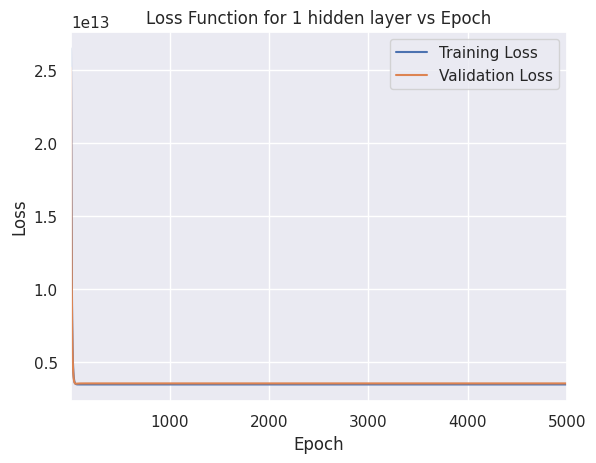

In [3]:
#Problem 1a
import torch.nn as nn

seq_model=nn.Sequential(nn.Linear(12,32),nn.Tanh(),nn.Linear(32,1))
optimizer = optim.SGD(seq_model.parameters(),lr=1e-3)



epochs=5000
loss_fn=nn.MSELoss()
loss_df = pd.DataFrame(columns=['Epoch','Training Loss','Validation Loss'])


for epoch in range(1,epochs +1):
    train = seq_model(X_train)
    loss_train = loss_fn(train,Y_train)

    val = seq_model(X_test)
    loss_val = loss_fn(val,Y_test)

    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    loss_data= {'Epoch':epoch,'Training Loss':loss_train.detach().numpy(),'Validation Loss':loss_val.detach().numpy()}
    append_data = pd.DataFrame(data=loss_data,index=[epoch])
    loss_df = pd.concat([loss_df,append_data])

    if epoch == 1 or epoch % 50 == 0:
        print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"f" Validation loss {loss_val.item():.4f}")


# print(seq_model.hidden_linear.weight.grad)
# print(seq_model.bias)

#Plot loss over epoch
fig1, ax = plt.subplots()
ax.plot(loss_df['Training Loss'])
ax.plot(loss_df['Validation Loss'])
ax.legend(['Training Loss','Validation Loss'])
ax.set_title('Loss Function for 1 hidden layer vs Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_xlim(1,epochs)

Epoch 1, Training loss 5145639.0000, Validation loss 5015851.0000
Epoch 500, Training loss 5145637.0000, Validation loss 5015850.0000
Epoch 1000, Training loss 5145632.5000, Validation loss 5015845.0000
Epoch 1500, Training loss 5145625.5000, Validation loss 5015838.0000
Epoch 2000, Training loss 5145618.0000, Validation loss 5015830.5000
Epoch 2500, Training loss 5145610.5000, Validation loss 5015823.0000
Epoch 3000, Training loss 5145603.0000, Validation loss 5015816.0000
Epoch 3500, Training loss 5145596.0000, Validation loss 5015808.5000
Epoch 4000, Training loss 5145588.5000, Validation loss 5015801.5000
Epoch 4500, Training loss 5145581.0000, Validation loss 5015794.0000
Epoch 5000, Training loss 5145574.0000, Validation loss 5015786.5000


(1.0, 5000.0)

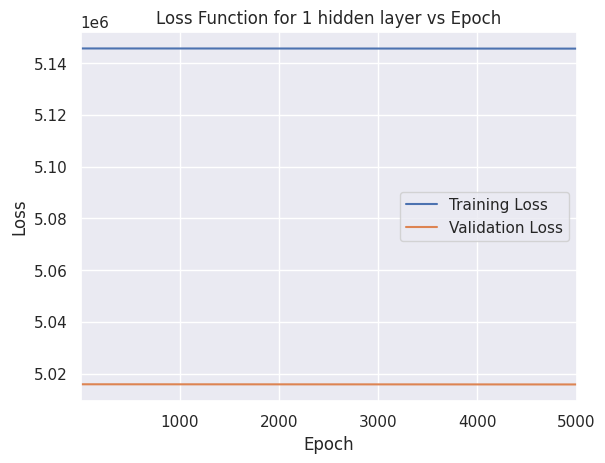

In [4]:

#Problem 1b
seq_model=nn.Sequential(nn.Linear(12,32),nn.Tanh(),nn.Linear(32,64),nn.Tanh(),nn.Linear(64,16),nn.Tanh(),nn.Linear(16,1))
optimizer = optim.SGD(seq_model.parameters(),lr=1e-3)



epochs=5000
loss_fn=nn.MSELoss()
loss_df = pd.DataFrame(columns=['Epoch','Training Loss','Validation Loss'])


for epoch in range(1,epochs +1):
    train = seq_model(X_train)
    loss_train = torch.sqrt(loss_fn(train,Y_train))

    val = seq_model(X_test)
    loss_val = torch.sqrt(loss_fn(val,Y_test))

    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    loss_data= {'Epoch':epoch,'Training Loss':loss_train.detach().numpy(),'Validation Loss':loss_val.detach().numpy()}
    append_data = pd.DataFrame(data=loss_data,index=[epoch])
    loss_df = pd.concat([loss_df,append_data])

    if epoch == 1 or epoch % 500 == 0:
        print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"f" Validation loss {loss_val.item():.4f}")


# print(seq_model.hidden_linear.weight.grad)
# print(seq_model.bias)

#Plot loss over epoch
fig1, ax = plt.subplots()
ax.plot(loss_df['Training Loss'])
ax.plot(loss_df['Validation Loss'])
ax.legend(['Training Loss','Validation Loss'])
ax.set_title('Loss Function for 1 hidden layer vs Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_xlim(1,epochs)

In [2]:

#Problem 2
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

from torchvision import datasets
import torch.nn as nn
import time

data_path = './'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

from torchvision import transforms
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,transform=transforms.ToTensor())
tensor_cifar10_val = datasets.CIFAR10(data_path, train=False, download=False,transform=transforms.ToTensor())

imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

# mean = imgs.view(3, -1).mean(dim=1)
# std = imgs.view(3, -1).std(dim=1)

# transforms.Normalize(mean, std)

transformed_cifar10 = datasets.CIFAR10(
data_path, train=True, download=False,
transform=transforms.Compose([
transforms.ToTensor(),
transforms.Normalize((0.4915, 0.4823, 0.4468),
(0.2470, 0.2435, 0.2616))
]))


imgs_val = torch.stack([img_t for img_t, _ in tensor_cifar10_val], dim=3)
imgs_val.shape

mean = imgs_val.view(3, -1).mean(dim=1)
std = imgs_val.view(3, -1).std(dim=1)

transforms.Normalize(mean, std)

transformed_cifar10_val = datasets.CIFAR10(
data_path, train=False, download=False,
transform=transforms.Compose([
transforms.ToTensor(),
transforms.Normalize((0.4942, 0.4851, 0.4504),
(0.2467, 0.2429, 0.2616))
]))

n_out = 10

train_loader = torch.utils.data.DataLoader(transformed_cifar10, batch_size=64,shuffle=True)

model = nn.Sequential(
nn.Linear(3072,512),
nn.Tanh(),
nn.Linear(512,10),
nn.Softmax(dim=1)
)

loss_fn = nn.NLLLoss()

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 300
t0 = time.time()
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

t1=time.time()
print("Training time:" + str(t1-t0)+ " Seconds")

val_loader = torch.utils.data.DataLoader(tensor_cifar10_val, batch_size=64,shuffle=False)

correct = 0
total = 0

y_pred = np.zeros(0)
y_test = np.zeros(0)

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        y_pred = np.append(y_pred,predicted.detach().numpy())
        y_test = np.append(y_test,labels.detach().numpy())
        correct += int((predicted == labels).sum())
print("Accuracy: %f", correct / total)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
class_names=['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck'] # name  of classes
fig, ax = plt.subplots()

# create heatmap
sns.heatmap(cnf_matrix, annot=True, cmap="RdYlGn" ,fmt='g')
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


100%|██████████| 170498071/170498071 [00:10<00:00, 16512289.16it/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [3]:
#Problem 2b
from torchvision import datasets
import torch.nn as nn
import time
model2 = nn.Sequential(nn.Linear(3072, 1024),nn.Tanh(),nn.Linear(1024, 512),nn.Tanh(),nn.Linear(512, 128),nn.Tanh(),nn.Linear(128, 10),nn.LogSoftmax(dim=1))
loss_fn = nn.NLLLoss()
t0 = time.time()
n_epochs = 300
train_loader = torch.utils.data.DataLoader(transformed_cifar10, batch_size=64,shuffle=True)

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model2(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

t1=time.time()
print("Training time:" + str(t1-t0)+ " Seconds")
val_loader = torch.utils.data.DataLoader(tensor_cifar10_val, batch_size=64,shuffle=False)

correct = 0
total = 0

y_pred = np.zeros(0)
y_test = np.zeros(0)

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model2(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        y_pred = np.append(y_pred,predicted.detach().numpy())
        y_test = np.append(y_test,labels.detach().numpy())
        correct += int((predicted == labels).sum())
print("Accuracy: %f", correct / total)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
class_names=['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(cnf_matrix, annot=True, cmap="RdYlGn" ,fmt='g')
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

False

In [ ]:
val_loader = torch.utils.data.DataLoader(tensor_cifar10_val, batch_size=64,shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print("Accuracy: %f", correct / total)

Accuracy: %f 0.324


Accuracy: %f 0.091


Text(0.5, 427.9555555555555, 'Predicted label')

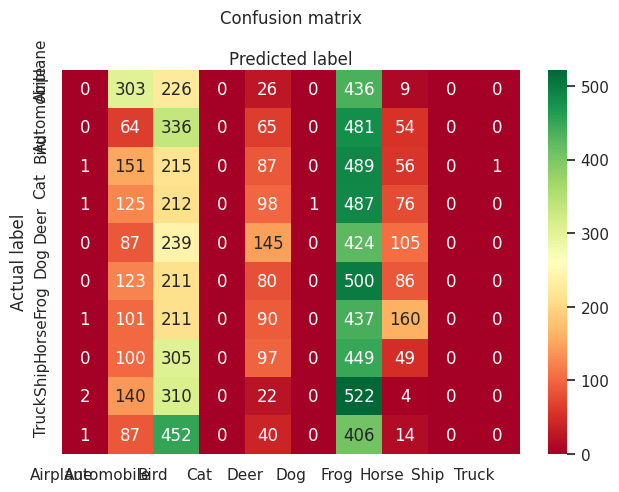

In [7]:
#Problem 2b
from torchvision import datasets
import torch.nn as nn
import time
model2 = nn.Sequential(nn.Linear(3072, 1024),nn.Tanh(),nn.Linear(1024, 512),nn.Tanh(),nn.Linear(512, 128),nn.Tanh(),nn.Linear(128, 10),nn.LogSoftmax(dim=1))
loss_fn = nn.NLLLoss()
t0 = time.time()
n_epochs = 50
train_loader = torch.utils.data.DataLoader(transformed_cifar10, batch_size=64,shuffle=True)

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model2(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

t1=time.time()
print("Training time:" + str(t1-t0)+ " Seconds")
val_loader = torch.utils.data.DataLoader(tensor_cifar10_val, batch_size=64,shuffle=False)

correct = 0
total = 0
y_pred = np.zeros(0)
y_test = np.zeros(0)
tick_marks = np.arange(len(class_names))
with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model2(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        y_pred = np.append(y_pred,predicted.detach().numpy())
        y_test = np.append(y_test,labels.detach().numpy())
        correct += int((predicted == labels).sum())
print("Accuracy: %f", correct / total)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
class_names=['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck'] # name  of classes
fig, ax = plt.subplots()

# create heatmap
sns.heatmap(cnf_matrix, annot=True, cmap="RdYlGn" ,fmt='g')
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')